<h3> 크롤링 데이터

* title
* date
* tags
* 기업명
* 링크

<h3> 데이터 기간(23.11.7 기준)

* 2023년 -> 3개 밖에 없음
* 전체 : 7페이지(6개씩) / 37개
* 크롤링 기간 : 2020 ~ 2023

* 카카오 엔터 : https://tech.kakaoenterprise.com/
* 사이트 구성
  * TECH LOG : 크롤링 대상
  * KREW INSIGHT : 사내 정보라 크롤링이 필요할까?
  * TECH TREND : 크롤링 대상 -> 생각해보니 성격이 안맞는?
  * TECH & NEWS : 글이 1개 밖에 없음

<h3> robots.txt 확인

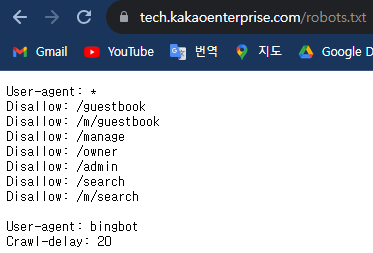

In [2]:
# requests 설치
# %pip install requests
# BeautifulSoup 설치
# %pip install bs4

In [3]:
import requests
import time
import csv
from bs4 import BeautifulSoup

In [4]:
articles_data = []
company_name = '카카오엔터프라이즈'

In [6]:
for page_num in range(1,8):
    list_page_res = requests.get('https://tech.kakaoenterprise.com/category/Tech%20Log?page={}'.format(page_num))
    list_page_soup = BeautifulSoup(list_page_res.text, 'html.parser')
    posts = list_page_soup.find('div', class_='post-inner').find_all('li')

    for post in posts:
        link = 'https://tech.kakaoenterprise.com' + post.find('a', class_='kep-row-link')['href']
        post_res = requests.get(link)
        post_soup = BeautifulSoup(post_res.text, 'html.parser')
        tags_list = []
        tags = post_soup.find('div', class_='article-tags').find_all('a')

        for tag in tags:
            tags_list.append(tag.text)

        article_data = {
            'title' : post.find('p').text,
            'date' : post_soup.find('span', class_='date').text,
            'tags' : tags_list,
            'company' : company_name,
            'link' : link
        }

        articles_data.append(article_data)
        time.sleep(20)

print(len(articles_data))

37


In [7]:
file_name = './kakaoenter_data.csv'
with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=articles_data[0].keys())
    
    writer.writeheader()
    
    for data in articles_data:
        data['tags'] = ', '.join(data['tags'])
        writer.writerow(data)

print('완료')

완료
